** we will develop basic recommendation systems using Python and pandas. We'll use the MovieLens dataset. This model just let's you know what movies are similar to a selected movie **

In [1]:
import numpy as np
import pandas as pd

## Get the Data

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


Now let's get the movie titles:

In [4]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


Merging both the DataFrames together

In [5]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# EDA

Let's explore the data a bit and get a look at some of the best rated movies.

## Visualization Imports

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

Let's create a ratings dataframe with average rating and number of ratings:

In [7]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [8]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [9]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


Now lets set the number of ratings column:

In [10]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Now let's visualize the number of ratings received and the average rating for movies 

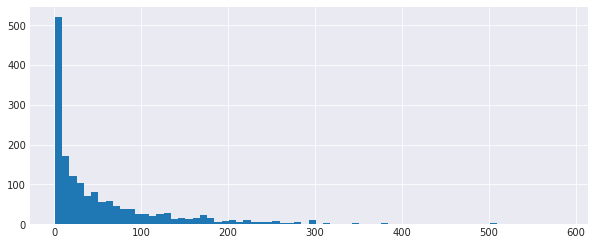

In [18]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

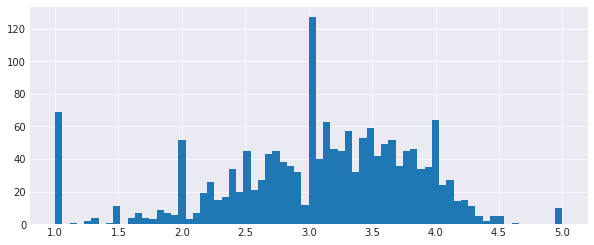

In [19]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

/home/rishabh/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/home/rishabh/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



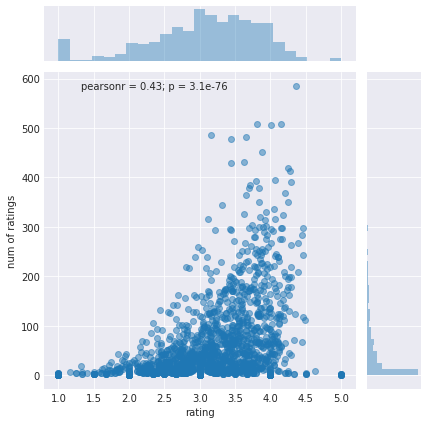

In [13]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:

## Recommending Similar Movies

Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [14]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most rated movie:

**Let's create a function that accepts a name of the movie and returns recommendations **

In [15]:
def recom_movies(s):
    """This function accepts a name of the movie and returns recommendations
    Arguments:
                s-Name of the movie
    Returns:
                res- Top 5 Recommendations"""
    selected_movie_ratings=()
    selected_movie_ratings=moviemat[s]
    similar_to_selected=moviemat.corrwith(selected_movie_ratings)#Finding out the correlation with other movies
    corr_selected = pd.DataFrame(similar_to_selected,columns=['Correlation'])#creating a pd DataFrame
    corr_selected.dropna(inplace=True)#removing NAN values
    corr_selected = corr_selected.join(ratings['num of ratings'])
    res=corr_selected[corr_selected['num of ratings']>50].sort_values('Correlation',ascending=False).head(6)#sorting the recoms. with atleast 50 ratings
    return res  

In [16]:
print(pd.DataFrame(df['title'].unique()))

                                                      0
0                                      Star Wars (1977)
1                       Empire Strikes Back, The (1980)
2                             Gone with the Wind (1939)
3                                          Kolya (1996)
4                              L.A. Confidential (1997)
5                                   Heavyweights (1994)
6                            Legends of the Fall (1994)
7                                   Jackie Brown (1997)
8     Dr. Strangelove or: How I Learned to Stop Worr...
9                      Hunt for Red October, The (1990)
10                              Jungle Book, The (1994)
11                                        Grease (1978)
12                       Remains of the Day, The (1993)
13                                  Men in Black (1997)
14        Romy and Michele's High School Reunion (1997)
15                      Star Trek: First Contact (1996)
16    To Wong Foo, Thanks for Everything! Julie 

In [19]:
mov=input()#Enter a movie name with year in () and enclosed within '' to find recoomendations. Be sure the movie is in the list
get_recom=recom_movies(mov)
print(pd.DataFrame(get_recom.head(6)))

'Die Hard (1988)'
                                   Correlation  num of ratings
title                                                         
Die Hard (1988)                       1.000000             243
Soul Food (1997)                      0.578591              59
Die Hard: With a Vengeance (1995)     0.577216             151
Bananas (1971)                        0.549859              57
Die Hard 2 (1990)                     0.510473             166
Nell (1994)                           0.508599              81


# Thank you